# Simple Neural Network

In [1]:
!python --version

Python 3.12.3


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from common import load_coffee_data, plt_roast

/Users/mrc/project/learningml/.venv/lib/python3.12/site-packages/keras/src/export/tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


(200, 2) (200, 1)


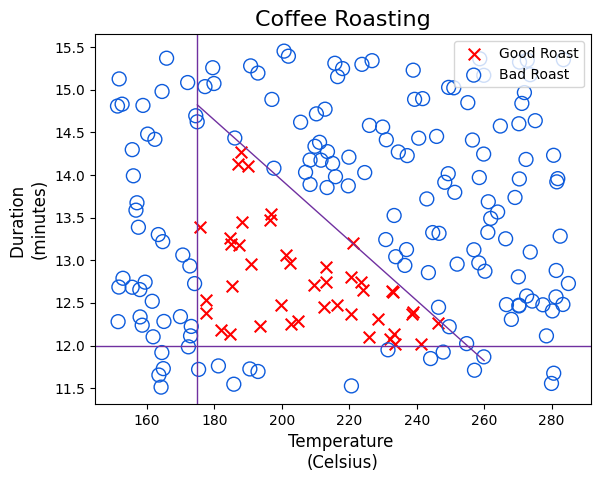

In [4]:
X,y = load_coffee_data()
print(X.shape,y.shape)

plt_roast(X,y)

In [5]:
print(f"Temperature Max, Min pre normalization: {np.max(X[:,0]):0.2f}, {np.min(X[:,0]):0.2f}")
print(f"Duration    Max, Min pre normalization: {np.max(X[:,1]):0.2f}, {np.min(X[:,1]):0.2f}")


Temperature Max, Min pre normalization: 284.99, 151.32
Duration    Max, Min pre normalization: 15.45, 11.51


In [7]:
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X)
Xn = norm_l(X)

print(f"Temperature Max, Min post normalization: {np.max(Xn[:,0]):0.2f}, {np.min(Xn[:,0]):0.2f}")
print(f"Duration    Max, Min post normalization: {np.max(Xn[:,1]):0.2f}, {np.min(Xn[:,1]):0.2f}")

Temperature Max, Min post normalization: 1.66, -1.69
Duration    Max, Min post normalization: 1.79, -1.70


In [8]:
Xt = np.tile(Xn,(1000,1))
Yt= np.tile(y,(1000,1))
print(Xt.shape, Yt.shape)   

(200000, 2) (200000, 1)


In [11]:
tf.random.set_seed(1234)
model = Sequential([
    tf.keras.Input(shape=(2,)),
    Dense(3, activation='sigmoid', name="L1"),
    Dense(1, activation='sigmoid', name="L2"),
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L2 (Dense)                      │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
)

model.fit(
    Xt,Yt,            
    epochs=10,
)

Epoch 1/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 3s 403us/step - loss: 0.1644
Epoch 2/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 3s 398us/step - loss: 0.0826
Epoch 3/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 2s 397us/step - loss: 0.0218
Epoch 4/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 3s 406us/step - loss: 0.0129
Epoch 5/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 2s 396us/step - loss: 0.0088
Epoch 6/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 2s 395us/step - loss: 0.0062
Epoch 7/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 2s 396us/step - loss: 0.0044
Epoch 8/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 3s 410us/step - loss: 0.0032
Epoch 9/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 3s 418us/step - loss: 0.0023
Epoch 10/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 3s 432us/step - loss: 0.0017


In [14]:
W1, b1 = model.get_layer("L1").get_weights()
W2, b2 = model.get_layer("L2").get_weights()
print("W1:\n", W1, "\nb1:", b1)
print("W2:\n", W2, "\nb2:", b2)

W1:
 [[ 14.333421    -0.12995067 -11.144366  ]
 [ 11.969767    -9.0157385   -0.21240067]] 
b1: [  1.8285135 -11.245892  -12.170082 ]
W2:
 [[-44.49576 ]
 [-47.934025]
 [-52.1281  ]] 
b2: [27.409788]


In [15]:

X_test = np.array([
    [200,13.9],  # postive example
    [200,17]])   # negative example
X_testn = norm_l(X_test)
predictions = model.predict(X_testn)
print("predictions = \n", predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
predictions = 
 [[9.7982496e-01]
 [3.7045169e-08]]
